## Gaussian Process Classification (GPC) for MNIST digits classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import GPy
from GPy.likelihoods import Bernoulli
from GPy.kern import RBF
from GPy.models import GPClassification
from GPy.inference.latent_function_inference.expectation_propagation import EP
from GPy.inference.latent_function_inference.laplace import Laplace
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [3]:
# Load data 
from torchvision import datasets

data = datasets.USPS(root = './data', train=True, download=True)
test_data = datasets.USPS(root = './data', train=False, download=True)

X = data.data.reshape(-1, 256)
y = np.array(data.targets).reshape(-1, 1)

X_test = test_data.data.reshape(-1, 256)
y_test = np.array(test_data.targets).reshape(-1, 1)

X = X[np.logical_or(y == 3, y == 5).flatten()]
y = y[np.logical_or(y == 3, y == 5).flatten()]

X_test = X_test[np.logical_or(y_test == 3, y_test == 5).flatten()]
y_test = y_test[np.logical_or(y_test == 3, y_test == 5).flatten()]

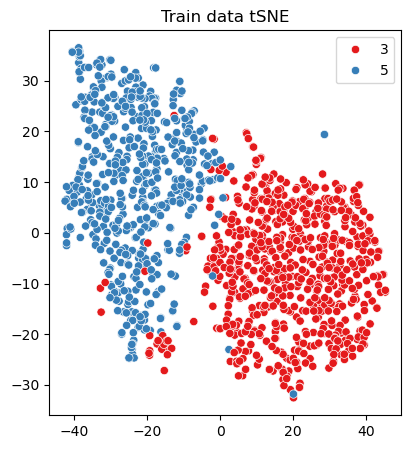

In [4]:
# tSNE for visulization
from sklearn.manifold import TSNE

tSNE = TSNE(n_components=2, random_state=0)
X_tSNE = tSNE.fit_transform(X)

# Plot

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.scatterplot(x=X_tSNE[:,0], y=X_tSNE[:,1], hue=y.flatten(), palette='Set1')
plt.legend(loc='upper right')
plt.title('Train data tSNE')
plt.show()

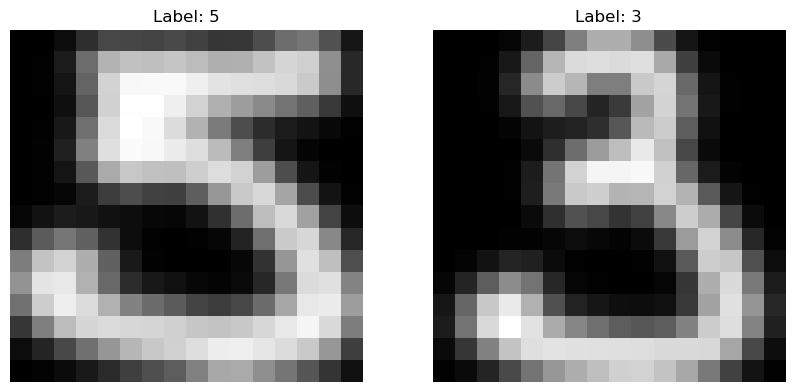

In [5]:
# sample image
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(X[0].reshape(16, 16), cmap='gray')
plt.title('Label: {}'.format(y[0,0]))
plt.axis('off')
plt.subplot(122)
plt.imshow(X[1].reshape(16, 16), cmap='gray')
plt.title('Label: {}'.format(y[1,0]))
plt.axis('off')
plt.show()

In [6]:
# Y to {-1, 1}

y[y == 3] = -1
y[y == 5] = 1

y_test[y_test == 3] = -1
y_test[y_test == 5] = 1

In [11]:
kernel = RBF(input_dim = 256, lengthscale=np.exp(2.85), variance=np.exp(2.35))

model_EP = GPy.core.GP(X=X, Y=y, kernel=kernel, inference_method = GPy.inference.latent_function_inference.expectation_propagation.EP(), likelihood=GPy.likelihoods.Bernoulli())

print(model_EP)


Name : gp
Objective : 841.4806771997735
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  10.485569724727576  |      +ve      |        
  rbf.lengthscale  |   17.28778184056764  |      +ve      |        


In [12]:
for i in range(5):
    model_EP.optimize('bfgs', max_iters=100)
    print('iteration: {}'.format(i))
    print(model_EP)

iteration: 0

Name : gp
Objective : 841.4806771997739
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  10.485569724727576  |      +ve      |        
  rbf.lengthscale  |   17.28778184056764  |      +ve      |        
iteration: 1

Name : gp
Objective : 841.4806771997739
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  10.485569724727576  |      +ve      |        
  rbf.lengthscale  |   17.28778184056764  |      +ve      |        
iteration: 2

Name : gp
Objective : 841.4806771997739
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |               value  |  constraints  |  priors
  rbf.variance     |  10.485569724727576  |      +ve      |        
  rbf.lengthscale  |   1

In [15]:
model_EP.predict(X)[0]

array([[0.85614795],
       [0.14385205],
       [0.14385205],
       ...,
       [0.14385205],
       [0.14385205],
       [0.14385205]])

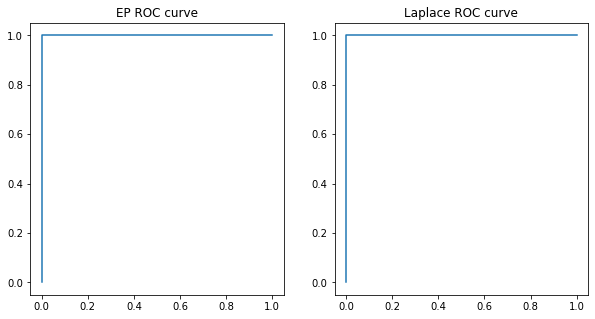

In [ ]:
# ROC curve

fpr_ep, tpr_ep, _ = roc_curve(Y_test, gpc_ep.predict(X_test)[0])
fpr_la, tpr_la, _ = roc_curve(Y_test, gpc_la.predict(X_test)[0])

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(fpr_ep, tpr_ep)
plt.title('EP ROC curve')
plt.subplot(122)
plt.plot(fpr_la, tpr_la)
plt.title('Laplace ROC curve')
plt.show()

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

Y_pred_ep = gpc_ep.predict(X_test)[0]
Y_pred_la = gpc_la.predict(X_test)[0]

cm_ep = confusion_matrix(Y_test, Y_pred_ep)
cm_la = confusion_matrix(Y_test, Y_pred_la)

print('EP confusion matrix')
print(cm_ep)
print('Laplace confusion matrix')
print(cm_la)

ValueError: Classification metrics can't handle a mix of binary and continuous targets